# 1 General parametrization of a qubit
Qubit states can be representid as combinations of basis vectior, where the dimension of the basis vector is 2

It is usual to use the basis that has vectors corresponding to the eigen-states of the $Z$ operator, namely $\vert 0 \rangle$ and $\vert 1 \rangle$

     
$\vert \psi \rangle =\cos \left(\theta /2\right)|0\rangle \,+\,e^{i\phi }\sin \left(\theta /2\right)|1\rangle =\cos \left(\theta /2\right)|0\rangle \,+\,(\cos \phi +i\sin \phi )\,\sin \left(\theta /2\right)|1\rangle $
          

This representation permits to generate any state from the base state 
- We will show show how this parameters span the bloch sphere.
- We will then show thatn this is indeed general. (It is a paremetrization of the Bloch sphere)


     
$\vert \psi \rangle =\cos \left(\theta /2\right)|0\rangle \,+\,e^{i\phi }\sin \left(\theta /2\right)|1\rangle =\cos \left(\theta /2\right)|0\rangle \,+\,(\cos \phi +i\sin \phi )\,\sin \left(\theta /2\right)|1\rangle $
     

This parametrizations allow us to use rotation gates to generate any particular state(up to a global phase) starting from $\vert 0 \rangle$ .

$\begin{aligned}R_{x}(\theta )&=e^{(-i\theta X/2)}=\cos(\theta /2)I-i\sin(\theta /2)X={\begin{bmatrix}\cos \theta /2&-i\sin \theta /2\\-i\sin \theta /2&\cos \theta /2\end{bmatrix}}\\R_{y}(\theta )&=e^{(-i\theta Y/2)}=\cos(\theta /2)I-i\sin(\theta /2)Y={\begin{bmatrix}\cos \theta /2&-\sin \theta /2\\\sin \theta /2&\cos \theta /2\end{bmatrix}}\\R_{z}(\theta )&=e^{(-i\theta Z/2)}=\cos(\theta /2)I-i\sin(\theta /2)Z={\begin{bmatrix}e^{-i\theta /2}&0\\0&e^{i\theta /2}\end{bmatrix}}\end{aligned}$



$\vert \psi \rangle = R_{z}(\phi ) R_{y}(\theta ) |0\rangle  $



In [1]:
import numpy as np

In [2]:
def Rz(angle_phi):
    """Parametrizable Gate for single qubit rotation on the Z axis"""
    return  np.array([[np.exp(-1j*angle_phi/2),0],[0,np.exp(1j*angle_phi/2)]])
    
    
Rz(0)    


array([[1.-0.j, 0.+0.j],
       [0.+0.j, 1.+0.j]])

In [3]:
def Ry(angle_theta):
    """Parametrizable Gate for single qubit rotation on the Y axis"""
    return np.array([[np.cos(angle_theta/2),- np.sin(angle_theta/2)],[np.sin(angle_theta/2),np.cos(angle_theta/2)]])
    
    
Ry(np.pi)    
    
    

array([[ 6.123234e-17, -1.000000e+00],
       [ 1.000000e+00,  6.123234e-17]])

In [4]:
def generate_state(angle_phi,angle_theta):
    """ Applies rotation gates with parameters \phi and \theta  to state \vert 0 \rangle"""
    
    state0 =np.array([1.,0.])
    
    return np.dot(Rz(angle_phi), np.dot(Ry(angle_theta), state0 ))
    
    
    
    

We now show how to obtain some particular states applying this rotations

In [212]:
#\0> state
generate_state(0,0)

array([1.+0.j, 0.+0.j])

In [213]:
#\1> state, PI in angle theta takes me from one pole of the bloch sphere to the other
generate_state(0,np.pi)

array([6.123234e-17+0.j, 1.000000e+00+0.j])

In [214]:
#\x+> state
generate_state(0,np.pi/2)

array([0.70710678+0.j, 0.70710678+0.j])

In [215]:
#\x-> state
generate_state(0,np.pi*3/2)

array([-0.70710678+0.j,  0.70710678+0.j])

In [234]:
#\y+> state
generate_state(np.pi/2,np.pi/2)

array([0.5-0.5j, 0.5+0.5j])

In [218]:
import qutip

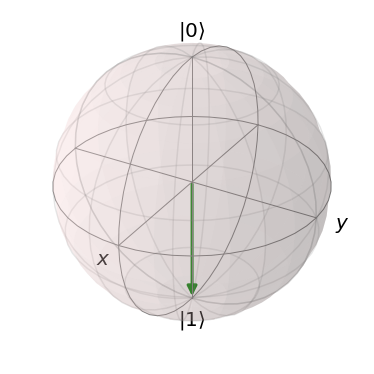

In [226]:
b = qutip.Bloch()

state = generate_state(np.pi/2,np.pi)

pnt = state[0]*qutip.basis(2,0) + state[1]*qutip.basis(2,1)

b.add_states(pnt)

b.show()

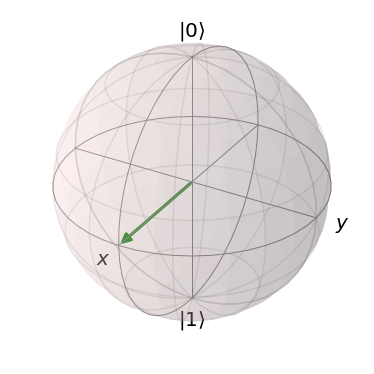

In [235]:
b = qutip.Bloch()

state = generate_state(0,np.pi/2)

pnt = state[0]*qutip.basis(2,0) + state[1]*qutip.basis(2,1)

b.add_states(pnt)

b.show()

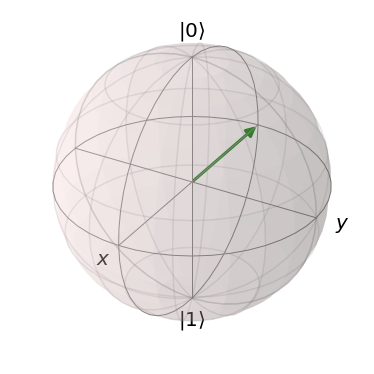

In [862]:
b = qutip.Bloch()

state = generate_state(np.pi,np.pi/2)

pnt = state[0]*qutip.basis(2,0) + state[1]*qutip.basis(2,1)

b.add_states(pnt)

# In [15]: vec = [0,1,0]

# In [16]: b.add_vectors(vec)

# In [17]: up = basis(2,0)

# In [18]: b.add_states(up)
b.show()

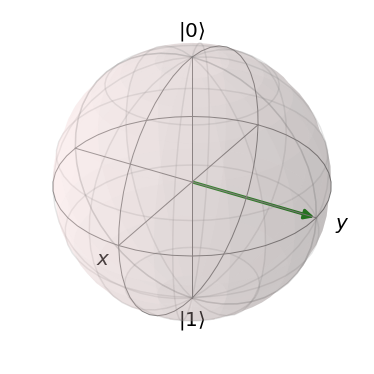

In [233]:
b = qutip.Bloch()

state = generate_state(np.pi/2,np.pi/2)

pnt = state[0]*qutip.basis(2,0) + state[1]*qutip.basis(2,1)

b.add_states(pnt)

b.show()

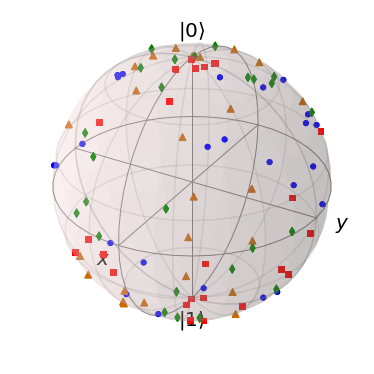

In [254]:
b = qutip.Bloch()

random_phis = np.random.uniform(0,2*np.pi,size=100)
random_thetas = np.random.uniform(0,np.pi,size=100)

for phi,theta in zip(random_phis,random_thetas):
    
    state =generate_state(phi,theta)
    
    pnt = state[0]*qutip.basis(2,0) + state[1]*qutip.basis(2,1)

    b.add_states(pnt,kind='point')
    
    
b.show()    


If we vary phi we will get all the posible points along the equator

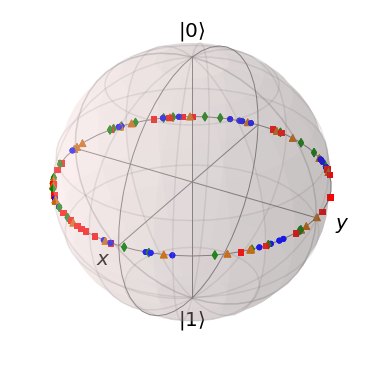

In [255]:
b = qutip.Bloch()

random_phis = np.random.uniform(0,2*np.pi,size=100)
#random_thetas = np.random.uniform(0,2*np.pi,size=100)

for phi in random_phis:
    
    state =generate_state(phi,np.pi/2)
    
    pnt = state[0]*qutip.basis(2,0) + state[1]*qutip.basis(2,1)

    b.add_states(pnt,kind='point')
    
    
b.show()    


If we vary $ \theta$ we will get all the points at different inclinations form the axis z, i.e we are geting points along the different meridians.

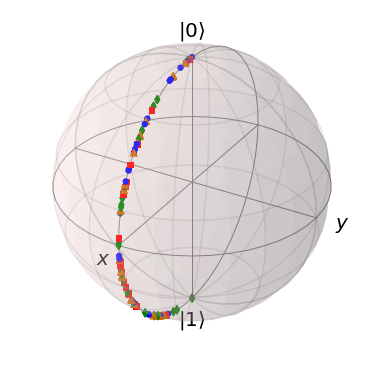

In [256]:
b = qutip.Bloch()

#random_phis = np.random.uniform(0,np.pi,size=100)
random_thetas = np.random.uniform(0,np.pi,size=100)

for theta in random_thetas:
    
    state =generate_state(0,theta)
    
    pnt = state[0]*qutip.basis(2,0) + state[1]*qutip.basis(2,1)

    b.add_states(pnt,kind='point')
    
    
b.show()    


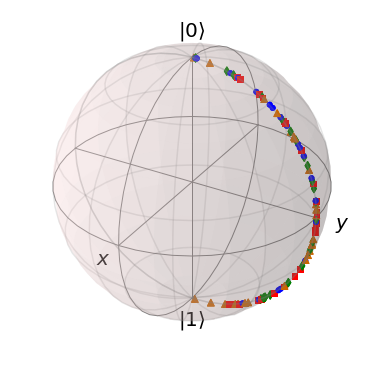

In [259]:
b = qutip.Bloch()

#random_phis = np.random.uniform(0,np.pi,size=100)
random_thetas = np.random.uniform(0,np.pi,size=100)

for theta in random_thetas:
    
    state =generate_state(np.pi/2,theta)
    
    pnt = state[0]*qutip.basis(2,0) + state[1]*qutip.basis(2,1)

    b.add_states(pnt,kind='point')
    
    
b.show()    


As we can see we can choose any point on the sphere , whre $ \theta$  controls the inclination with respect to $z$ axis and $ \phi $ controls the azimuth movement.

# 2 SWAP test



In this part we are tasked with reproducing a given random state $\psi$ using the rotations from last point and swap tests.



The swap tests gives an estimat of ${|\langle \psi |\phi \rangle |}^{2}$, where usually $ \psi$ is an unknown state and $\phi$ a reference state.

For the case where $ \psi$ is a 1-qubit state, the circuit we need to build has a totalof 3-qubits, one for $\phi$ one for $\psi$ and one for an ancila state $a$ which we will mwasure directly.



We are going to first build the gates needed for the swap test.

Implement the swap test, and test it.

Observe how it performs for different states and number of iterations NUM_ITERATIONS.

IMPORTANT NOTE! to use the swap test with a certain NUM_ITERATIONS we have to be able to acquire NUM_ITERATIONS distinct intance of state $\psi$. This can be expensive, and will be a very important point later on.



We first define all the new one qubit gates we will be using on this section

In [34]:

# Define X gate (CNOT is controlled-X):

X = np.array([
[0, 1],
[1, 0]
])

# Define 2x2 Identity

I = np.identity(2)


# Define projection operator |0><0|

P0x0 = np.array([
[1, 0],
[0, 0]
])

# Define projection operator |1><1|

P1x1 = np.array([
[0, 0],
[0, 1]
])


In [35]:
Hadamard =  2**(-1/2) * np.array([[1,1],[1,-1]])
Hadamard

array([[ 0.70710678,  0.70710678],
       [ 0.70710678, -0.70710678]])

Nopw for the 2-qubit SWAP gate

In [7]:
SWAP =  np.array([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
SWAP

array([[1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1]])

And in general for the 3-qubit circuit

In [8]:
CSWAP = np.kron(P0x0, np.kron(I, I)) + np.kron(P1x1,SWAP)


Hadamard_1_3 = np.kron(Hadamard,np.kron(I, I))



Z_1_3 = np.kron(P0x0 - P1x1,np.kron(I,I))

P1_1_3 = np.kron( P1x1,np.kron(I,I))
P0_1_3 = np.kron( P0x0,np.kron(I,I))

In [9]:
P0x0 - P1x1

array([[ 1,  0],
       [ 0, -1]])

In [31]:
def normalize_vector(vec):
    
    return vec/np.linalg.norm(vec)

In [46]:
def measure_Z(prob):
    """Simulates the result of a measurement given the squared value of the component along 1 """
    
    sel_eigenstate = np.random.binomial(1,p= np.clip(prob,0,1))
    
    return sel_eigenstate

In [47]:
def apply_measurement_on_Z(prod_state):
    """ Applies a measurement returning both the value of the measurement and the projected state vector """
    
    prob = np.vdot(prod_state,np.dot(P1_1_3,prod_state)) 
    
    Z_result = measure_Z(prob)
    
    if Z_result == 0:
        
        prod_state =  np.dot(P0_1_3,prod_state)/np.sqrt(1-prob)
       # print('enters')
    else:
        
        prod_state = np.dot(P1_1_3,prod_state)/np.sqrt(prob)
    
    return Z_result , prod_state

In [13]:
def apply_measurement_on_Z1(prod_state):
    
    prob = np.vdot(prod_state,np.dot(P1x1,prod_state)) 
    
    Z_result = measure_Z(prob)
    
    if Z_result == 0:
        
        prod_state =  np.dot(P0x0,prod_state)/np.sqrt(1-prob)
       # print('enters')
    else:
        
        prod_state = np.dot(P1x1,prod_state)/np.sqrt(prob)
    
    return Z_result , prod_state

In [14]:
def swap_test(psi,reference_state):
    """ Swap test for 1-qubit state citcuit where we asume states psi and phi are given """
    #initialization
    ancilla = np.array([1,0])
    prod_state = np.kron(ancilla,np.kron(psi, reference_state))
    
    #main circuit
    prod_state = np.dot(Hadamard_1_3,prod_state)
    prod_state = np.dot(CSWAP,prod_state) 
    prod_state = np.dot(Hadamard_1_3,prod_state)
    Z_value, _ = apply_measurement_on_Z(prod_state)
    
    return Z_value
    
    

    


def repeated_swap_test(psi,reference_state,num_steps=10):
    """Applies 1-qubit state swap test repeatedly and outputs the |<psi|phi>|**2 estimate """
    
    
    measurements=[]
    
    for j in range(num_steps):    

        Z_value = swap_test(psi,reference_state)

        measurements.append(Z_value)#(1-res)/2)


    correlation_squared = 1-(2/num_steps)*sum(measurements)    
    
    return correlation_squared


we take two orthogonal state vectos for which we expect the result  of the scalar product to be aproximately zero

In [299]:
NUM_STEPS = 50
psi =  normalize_vector(np.array([1,-1],dtype = np.float32))
phi =  normalize_vector(np.array([1,1],dtype = np.float32))



In [300]:
repeated_swap_test(psi,phi,num_steps=NUM_STEPS)

0.12

50 steps gives a reasonable aproximation to fine tune the parameter NUM_STEPS it could be convenient to plot the variance  and mean of the estimatiuon for 100 independent realizations of the repeated  

In [15]:
import matplotlib
import matplotlib.pyplot as plt

In [336]:

mean_per_num_step =[]
std_per_num_step =[]

for NUM_STEPS in range(5,500,10):

    realizations = [repeated_swap_test(psi,phi,num_steps=NUM_STEPS) for i in range(100)]
    
    mean_per_num_step.append(np.mean(realizations))
    
    
    std_per_num_step.append(np.std(realizations))
    
    
    
    

/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


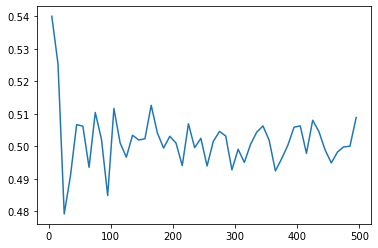

In [337]:
plt.plot([i for i in range(5,500,10)],mean_per_num_step)

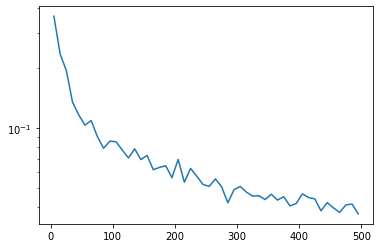

In [338]:
plt.plot([i for i in range(5,500,10)],std_per_num_step)
plt.yscale('log') 

We should check that this values are reproduce for different values of the theoretical correlation factor> 

In [339]:
psi =  normalize_vector(np.array([1,1j]))
phi =  normalize_vector(np.array([1,1j]))



In [340]:

mean_per_num_step =[]
std_per_num_step =[]

for NUM_STEPS in range(5,500,10):

    realizations = [repeated_swap_test(psi,phi,num_steps=NUM_STEPS) for i in range(100)]
    
    mean_per_num_step.append(np.mean(realizations))
    
    
    std_per_num_step.append(np.std(realizations))
    
    
    
    

/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


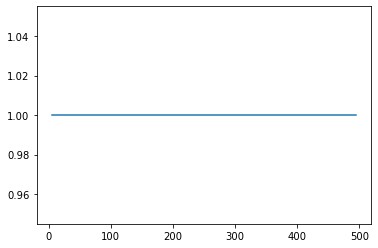

In [341]:
plt.plot([i for i in range(5,500,10)],mean_per_num_step)

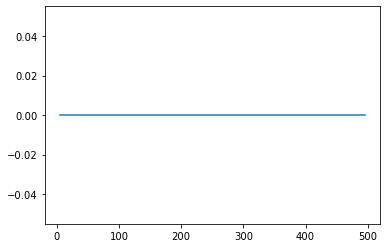

In [342]:
plt.plot([i for i in range(5,500,10)],std_per_num_step)

In [346]:
psi =  normalize_vector(np.array([1,1j]))
phi =  normalize_vector(np.array([1,1]))



In [347]:

mean_per_num_step =[]
std_per_num_step =[]

for NUM_STEPS in range(5,500,10):

    realizations = [repeated_swap_test(psi,phi,num_steps=NUM_STEPS) for i in range(100)]
    
    mean_per_num_step.append(np.mean(realizations))
    
    
    std_per_num_step.append(np.std(realizations))
    
    
    
    

/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


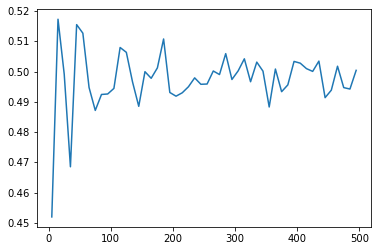

In [348]:
plt.plot([i for i in range(5,500,10)],mean_per_num_step)

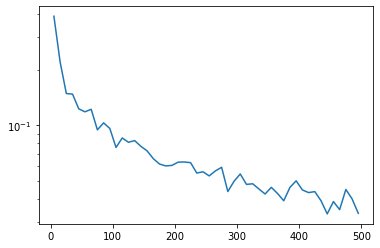

In [349]:
plt.plot([i for i in range(5,500,10)],std_per_num_step)
plt.yscale('log') 

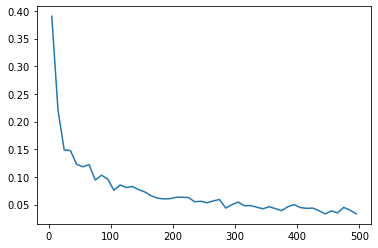

In [350]:
plt.plot([i for i in range(5,500,10)],std_per_num_step)

Using NUM_STEPS = 300 seems suficient to achieve an standard deviation around 0.05 larger NUM)STEPS appear to show diminishing returns

All this analysis may vary one applied on a real world QC because of the presence of noise sources. 



## 2.2 solving by measurement

Now we direct our attention to solving the main part of point 2 , which is finding the best parameters $\theta$ and  $\phi$ to reproduce a random state $\psi$.

A naive approach would be just to use the swap test to estimate the squared modulus  ${|\langle \psi |\phi \rangle |}^{2}$ (with $\phi$ a reference state) using the swap test. if   ${|\langle \psi |\phi \rangle |}^{2} \neq 1$ that means they are not equal so we propose another reference state. We can choose another reference state by moving along the bloch sphere in $\theta$ and $\phi$ from the original reference in the direction that ${|\langle \psi |\phi \rangle |}^{2}$ increases. This can be costly since in the worst case scenario we would be performing as many swap tests as the dimension we choose for the grid. 





A better approach is to measure the components of $\psi$ in the $z$ and $x$ axis, estimate the angular parameters, and then fine tune them using swap tests as was proposed before.





The following method for accomplishes the task,  is more efficient in terms of resources than using swap test to infer the parameters and then to check the quality of the final state.


- We get a random state 
- We then apply measurement N times to estimate the $\alpha$ and hence the $\theta$ parameter of the wavefunction

- we then apply an $ h$ gate and measure N times to estimate $ \phi$ using the information from the past step.

- we set up the circuit of section 1 in the task with the found parameters and check against the random state using a SWAP test.


In [54]:
NUM_MEASUREMENTS=1000
psi =np.array([0,1j])

In [16]:
def estimate_component_on_Z_basis(psi,num_measurements):


    measurements_Z=[]

    for i in range(num_measurements):

        Z_value, _  = apply_measurement_on_Z1(psi)

        measurements_Z.append(Z_value)



    beta = np.sqrt(np.mean(measurements_Z) )
    #alpha = np.sqrt(1 - (beta**2))
    alpha = np.sqrt(1. - np.mean(measurements_Z) )
    
    return alpha,beta


In [17]:
def estimate_component_on_X_basis(psi,num_measurements):

    measurements_X=[]
    
    for i in range(num_measurements):    
        
        psi_x = np.dot(Hadamard,psi)

        X_value, _  = apply_measurement_on_Z1(psi_x)

        measurements_X.append(X_value)


    beta_X = np.mean(measurements_X)
    
    return beta_X

In [18]:
def reproduce_state_circuit( psi,num_measurements=1000,num_steps=300):
        


    alpha,beta = estimate_component_on_Z_basis(psi,num_measurements=num_measurements)
    theta_estimated = 2*np.arcsin(beta)


    beta_X = estimate_component_on_X_basis(psi,num_measurements=num_measurements)

    phi_estimated = 2*np.arccos(np.clip((beta_X - 1.)/(2*(-alpha*beta)),-1,1)   )


    #generate a new reference state
    reference_state = generate_state(phi_estimated,theta_estimated)

    # 3-qubit circuit
    res= repeated_swap_test(psi,reference_state,num_steps=num_steps)



    return res,reference_state, theta_estimated,phi_estimated









we try the algorithm on many states and find agreement above 0.9 in general

In [1367]:
psi = normalize_vector(np.array([1,1j]))

In [1369]:
correlation_estimate,reference_state, theta_estimated,phi_estimated = reproduce_state_circuit( psi,num_measurements=1000,num_steps=300)

print(correlation_estimate)

0.9666666666666667


/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [1370]:
np.linalg.norm(np.vdot(reference_state,psi))

0.9656262753473805

In [1372]:
psi = normalize_vector(np.array([1,.5j]))

In [1373]:

correlation_estimate,reference_state, theta_estimated,phi_estimated = reproduce_state_circuit( psi,num_measurements=1000,num_steps=300)

print(correlation_estimate)

0.9933333333333333


/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [1374]:
np.linalg.norm(np.vdot(reference_state,psi))

0.9976357945894028

In [1375]:
psi = normalize_vector(np.array([1,-1]))

In [1376]:
correlation_estimate,reference_state, theta_estimated,phi_estimated = reproduce_state_circuit( psi,num_measurements=1000,num_steps=300)

print(correlation_estimate)

1.0


/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [1377]:
theta_estimated

1.5447933965701013

In [1378]:
phi_estimated

3.141592653589793

In [1379]:
psi = normalize_vector(np.array([1,-.25]))

In [1380]:
correlation_estimate,reference_state, theta_estimated,phi_estimated = reproduce_state_circuit( psi,num_measurements=1000,num_steps=300)

print(correlation_estimate)

0.94


/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [1381]:
theta_estimated

0.519635972919004

In [1382]:
phi_estimated

2.0204898055272635

In [1383]:
psi = normalize_vector(np.array([1,np.sqrt(1/2)+(np.sqrt(1/2)*1j)]))

In [1384]:
psi

array([0.70710678+0.j , 0.5       +0.5j])

In [1385]:
correlation_estimate,reference_state, theta_estimated,phi_estimated = reproduce_state_circuit( psi,num_measurements=1000,num_steps=300)

print(correlation_estimate)

0.9933333333333333


/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [1386]:
theta_estimated

1.5407918249714196

In [1387]:
phi_estimated

1.1005388772433358

In [1388]:
psi = normalize_vector(np.array([1,1]))

In [1389]:
correlation_estimate,reference_state, theta_estimated,phi_estimated = reproduce_state_circuit( psi,num_measurements=1000,num_steps=300)

print(correlation_estimate)

1.0


/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [902]:
theta_estimated

1.5575959434368374

In [903]:
phi_estimated

1.4383011704448736

In [1391]:
psi = normalize_vector(np.array([0,1]))

In [1392]:
correlation_estimate,reference_state, theta_estimated,phi_estimated = reproduce_state_circuit( psi,num_measurements=1000,num_steps=300)

print(correlation_estimate)

1.0


/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [1393]:
theta_estimated

3.141592653589793

In [1394]:
phi_estimated

0.0

Now if we repeat this computation a number of times we find out that we do not achieve exact reproducibility, i.e. we do not get 1 as a result of repeate swap test estimate. increasing the number of measurements above 100 has little effect in this respect.

In [1007]:
psi = normalize_vector(np.array([1,1j]))

In [1008]:

mean_per_num_measurements =[]
std_per_num_measurements =[]

for NUM_MEASUREMENTS in range(5,5000,200):
    
    realizations = [reproduce_state_circuit(psi,num_measurements=NUM_MEASUREMENTS,num_steps=300)[0] for i in range(30)]
    
    mean_per_num_measurements.append(np.mean(realizations))
    
    
    std_per_num_measurements.append(np.std(realizations))
    
    
    
    

/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


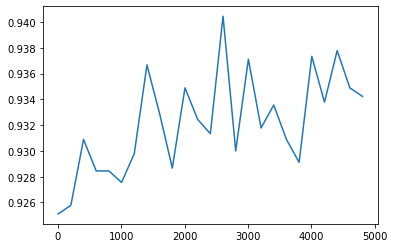

In [1009]:
plt.plot([i for i in range(5,5000,200)],mean_per_num_measurements)

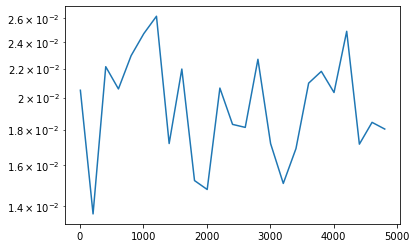

In [1010]:
plt.plot([i for i in range(5,5000,200)],std_per_num_measurements)
plt.yscale('log') 

In [1011]:
psi = normalize_vector(np.array([1,-1]))

In [1012]:

mean_per_num_measurements =[]
std_per_num_measurements =[]

for NUM_MEASUREMENTS in range(5,5000,200):
    
    realizations = [reproduce_state_circuit(psi,num_measurements=NUM_MEASUREMENTS,num_steps=300)[0] for i in range(30)]
    
    mean_per_num_measurements.append(np.mean(realizations))
    
    
    std_per_num_measurements.append(np.std(realizations))
    
    
    
    

/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


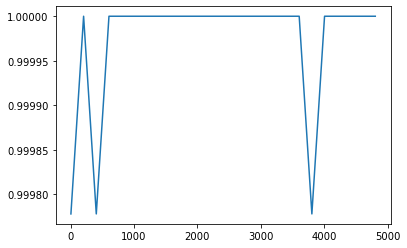

In [1013]:
plt.plot([i for i in range(5,5000,200)],mean_per_num_measurements)

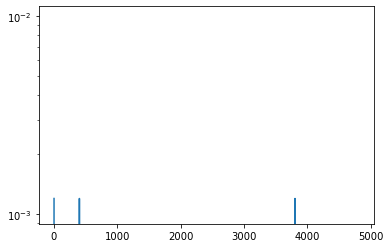

In [1014]:
plt.plot([i for i in range(5,5000,200)],std_per_num_measurements)
plt.yscale('log') 

In [1015]:
psi = normalize_vector(np.array([1,.5j]))

In [1016]:

mean_per_num_measurements =[]
std_per_num_measurements =[]

for NUM_MEASUREMENTS in range(5,5000,200):
    
    realizations = [reproduce_state_circuit(psi,num_measurements=NUM_MEASUREMENTS,num_steps=300)[0] for i in range(30)]
    
    mean_per_num_measurements.append(np.mean(realizations))
    
    
    std_per_num_measurements.append(np.std(realizations))
    
    
    
    
    
    

/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


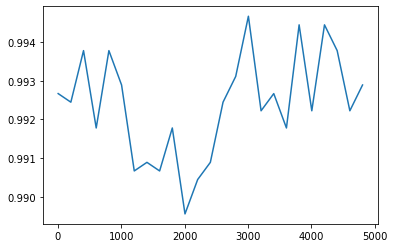

In [1017]:
plt.plot([i for i in range(5,5000,200)],mean_per_num_measurements)

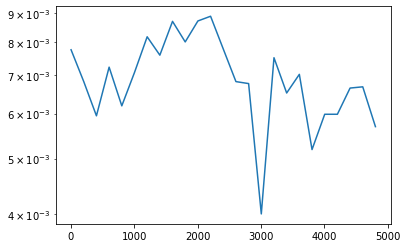

In [1018]:
plt.plot([i for i in range(5,5000,200)],std_per_num_measurements)
plt.yscale('log') 

As we see there is no gain in increasing the number of measurements above 200. If we want to reproduce the states perfectly we need to do a search in order to maximize the similarity between the given random state and the generated one. 

## 2.3 fine tuning routine


- explore nearby phi and theta if the value improves continue else terminate 


In [19]:
def move_theta_right(psi,phi,theta, epsilon,num_swap_steps = 300):
    

    updated_theta = theta + epsilon

    reference_state = generate_state(phi,updated_theta)
    updated_corr = repeated_swap_test(psi,reference_state,num_steps=num_swap_steps)
    
    return updated_corr,updated_theta
    
def move_theta_left(psi,phi,theta, epsilon,num_swap_steps = 300):
    

    updated_theta = theta - epsilon

    reference_state = generate_state(phi,updated_theta)




    updated_corr = repeated_swap_test(psi,reference_state,num_steps = num_swap_steps)
    
    return updated_corr,updated_theta
        
def move_phi_right(psi,phi,theta, epsilon,num_swap_steps = 300):


    updated_phi = phi + epsilon

    reference_state = generate_state(updated_phi,theta)




    updated_corr = repeated_swap_test(psi,reference_state,num_steps=num_swap_steps)

    return updated_corr,updated_phi

def move_phi_left(psi,phi,theta, epsilon,num_swap_steps = 300):

    updated_phi = phi - epsilon

    reference_state = generate_state(updated_phi,theta)




    updated_corr = repeated_swap_test(psi,reference_state,num_steps=num_swap_steps)

    return updated_corr,updated_phi

In [20]:
def refine_parameters(psi,phi,theta,epsilon,current_correlation):
        
        current_best_corr = current_correlation
        
        updated_corr,updated_theta = move_theta_right(psi,phi,theta, epsilon)

        if updated_corr > current_best_corr:


            while updated_corr > current_best_corr:

                current_best_corr = updated_corr
                theta=updated_theta


                updated_corr,updated_theta = move_theta_right(psi,phi,theta, epsilon)


        else :


            updated_corr,updated_theta = move_theta_left(psi,phi,theta, epsilon)

            while updated_corr > current_best_corr:

                current_best_corr = updated_corr
                theta=updated_theta


                updated_corr,updated_theta = move_theta_left(psi,phi,theta, epsilon)



        updated_corr,updated_phi = move_phi_right(psi,phi,theta, epsilon)

        if updated_corr > current_best_corr:

            while updated_corr > current_best_corr:

                current_best_corr =updated_corr
                phi = updated_phi

                updated_corr,updated_phi = move_phi_right(psi,phi,theta, epsilon)


        else :


            updated_corr,updated_phi = move_phi_left(psi,phi,theta, epsilon)


            while updated_corr > current_best_corr:

                current_best_corr = updated_corr
                phi = updated_phi

                updated_corr,updated_phi = move_phi_left(psi,phi,theta, epsilon)



        return current_best_corr,phi,theta

    








In [21]:
def refine_parameters_recursively(psi,phi,theta,current_correlation,epsilon=0.5,min_epsilon=0.005,debug =False):
    
    updated_epsilon = epsilon
    
    while updated_epsilon >= min_epsilon:
        
        current_correlation,phi,theta = refine_parameters(psi,phi,theta,updated_epsilon,current_correlation)
        if debug:
            print(current_correlation)
        current_correlation,phi,theta = refine_parameters(psi,phi,theta,updated_epsilon,current_correlation)
        if debug:
            print(current_correlation)
        
        current_correlation,phi,theta = refine_parameters(psi,phi,theta,updated_epsilon,current_correlation)
        if debug:
            print(current_correlation)
       
        if current_correlation ==1:
            break 
            
        updated_epsilon = updated_epsilon/2
        
    return   current_correlation,phi,theta 
    
    

we checj that the estimated correlation is improved after refinement, and usually gets to one more work is needed to narrow down the minimum number of repetitions and epsilon to obtain this always.

In [22]:
psi = normalize_vector(np.array([1,1j]))

In [23]:
estimated_correlation,_, theta_estimated,phi_estimated = reproduce_state_circuit(psi,num_measurements=1000,num_steps=300)

/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [24]:
theta_estimated,phi_estimated 

(1.5647962907943136, 2.059555725630942)

In [25]:
estimated_correlation

0.9133333333333333

In [26]:
out =  refine_parameters_recursively(psi,phi_estimated,theta_estimated,current_correlation = estimated_correlation)

/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [27]:
out

(1.0, 1.559555725630942, 1.5647962907943136)

In [28]:
psi = normalize_vector(np.array([1,0]))

In [29]:
estimated_correlation,_, theta_estimated,phi_estimated = reproduce_state_circuit(psi,num_measurements=100,num_steps=300)

/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [30]:
theta_estimated,phi_estimated 

(0.0, 0.0)

In [31]:
estimated_correlation

1.0

In [32]:
out =  refine_parameters_recursively(psi,phi_estimated,theta_estimated,current_correlation = estimated_correlation)

/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [33]:
out

(1.0, 0.0, 0.0)

In [34]:
psi = normalize_vector(np.array([1,-1]))

In [35]:
estimated_correlation,_, theta_estimated,phi_estimated = reproduce_state_circuit(psi,num_measurements=100,num_steps=300)

/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [36]:
theta_estimated,phi_estimated 

(1.4907107467612377, 3.141592653589793)

In [37]:
estimated_correlation

0.9933333333333333

In [38]:
out =  refine_parameters_recursively(psi,phi_estimated,theta_estimated,current_correlation = estimated_correlation)

/home/felipe/anaconda3/envs/Qiskit/lib/python3.7/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


In [39]:
out

(1.0, 3.141592653589793, 1.7407107467612377)

In [ ]:
def get_best_reproduction_of_state(psi):
    
    estimated_correlation,_, theta_estimated,phi_estimated = reproduce_state_circuit(psi,num_measurements=1000,num_steps=300)
    
    
    estimated_correlation,phi,theta =  refine_parameters_recursively(psi,phi_estimated,theta_estimated,current_correlation = estimated_correlation)
    
    
    return estimated_correlation,phi,theta
    
    
    
    

As we see in the examples we do not always obtain perfect reproductions in the first try of the original state. A likely proposal to improve this would be to base the initialization of phi  on calculating arctan instead of arccos due to its less asymptotic behaviour at the end of its range, which makes it numerically more stable.

# 3

There are many possible ways to solve this question.

The naive approach would be to just run swap test of out initial state against any possible  N qubit product state with single qubits in states 0  or  1 , this amounts to $ 2^N$ posibilities. Which means in worst case scenario we would run $2^N$ swap tests and in average it amounts to $ 2^{N-1}$ swap tests. 

A better approach would be to further exploit the assumption that the random N-qubit state is a poroduct state. This means that any measurement applied to any single qubit is independent of applying a measurement on the others.Then we can survey each qubit state separately, this means we could just run $N$ swap tests, each time checking the state of a different qubit, and do this a fixed number of times to avod false positive errors. Picking 7 gives as $ 2^{-8}\sim 0.005 $ error probability.


We could even dispense with the swap tests and just use one for checking the reproduced state against the original random state, after noting that states can only be 0 or 1. This will reduce the use of gates to just N measurements and then the ones used on only one single swap test. 



I will implement the second solution. 

I then will show how to solve this in the case of a general product state, and also how to use mo0dified swap tests to check the assumption.   





For this part we must generalize our gates so that they work for psi a general N-qubit state 

In [40]:
def unitvector(n,k):
    """Creates a unit vecttor of dimension n that pooints in direction k"""
    
    uvec = np.zeros(n)
    uvec[k]=1
    
    return uvec
    

The idea to generate the general swap vector comes from the general  decomposition of any operator as a weighted sum of ketbra over-all the qubits.

In [41]:
def generate_swap_matrix(n,i):
    """Generates the SWAP matrix for a pair of states of N qubits  on qubit i """
    
    I0= np.eye(2**i) #1 if i=0 else np.eye(2**i)
    I1= np.eye(2**(n-1))
    I2= np.eye(2**(n-i-1))#1 if (n-i-1)==0 else np.eye(2**(n-i-1))
    
    M=np.zeros(2**(2*n))
    
    for j in range(2):
        for k in range(2):
                
                M1 = np.kron(np.outer(unitvector(2,j),unitvector(2,k)),I2)
               # print(M1)
                M2 = np.kron(I1,M1)
              #  print(M2)
                M3 = np.kron(np.outer(unitvector(2,k),unitvector(2,j)),M2)
              #  print(M3)
                M4 = np.kron(I0,M3)
              #  print(M4)
                M = M+M4
                
               # M=M+np.kron(I0,np.kron(np.outer(unitvector(2,j),unitvector(2,i)),np.kron(I1,np.kron(np.outer(unitvector(2,i),unitvector(2,j)),I2)   ) ))
                
    return M
                
                
                
                
                
                

We check that we reobtain the swap matrix for the smallest dimensional cases

In [42]:
generate_swap_matrix(1,0)

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [43]:
generate_swap_matrix(2,0)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,

In [44]:
generate_swap_matrix(3,0)

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

We also generalize our measurement operation 




In [45]:
def apply_measurement_on_Z(prod_state,n):
    '''Applies measurement on the first qubit in the SWAP test'''
    
    I=np.eye(2**n)
    
    P0_n = np.kron(P0x0,np.kron(I,I))
    P1_n = np.kron(P1x1,np.kron(I,I))
    
    
    prob = np.vdot(prod_state,np.dot(P1_n,prod_state)) 
    
    Z_result = measure_Z(prob)
    
    if Z_result == 0:
        
        prod_state =  np.dot(P0_n,prod_state)/np.sqrt(1-prob)
       
    else:
        
        prod_state = np.dot(P1_n,prod_state)/np.sqrt(prob)
    
    return Z_result , prod_state

In [1341]:
def find_general_binary_product_state(psi,repetitions=8):
    
    #prepare gates

    N=int(np.log2(psi.shape))
    I=np.eye(2**N)
    Hadamard_1_3 = np.kron(Hadamard,np.kron(I, I))    
    P1_1_3 = np.kron( P1x1,np.kron(I,I))
    P0_1_3 = np.kron( P0x0,np.kron(I,I))



    qubit_measurements = np.zeros((N,repetitions))


    CSWAPs = [np.kron(P0x0, np.kron(I, I)) + np.kron(P1x1,generate_swap_matrix(N,i))  for i in range(N)] 


    
    #refence state set to |0,0,0....0>
    reference_state = np.zeros(2**N)
    reference_state[0]=1


    for j in range(repetitions):

        # prepare general state
        ancilla = np.array([1,0])
        prod_state = np.kron(ancilla,np.kron(psi, reference_state))

        for i in range(N):

            #run SWAP circuit
            prod_state = np.dot(Hadamard_1_3,prod_state)

            prod_state = np.dot(CSWAPs[i],prod_state) 


            prod_state = np.dot(Hadamard_1_3,prod_state)


            state, prod_state = apply_measurement_on_Z(prod_state,n=N)


            qubit_measurements[i,j] = state


            if state == 1:
                #reinitializing ancilla
                prod_state = np.dot(np.kron(Ry(np.pi),np.kron(I,I)),prod_state)

               
    #gather the measurements and if a swap test fdails (i.e. mean larger than 0) assign value \1> to qubit in position i

    
    qubit_states = (1*(qubit_measurements.mean(axis=1) >0)).tolist()
 
    final_state = 1    

    for q_state in qubit_states:

        qubit = np.zeros(2)
        qubit[q_state] =1

        final_state = np.kron(final_state,qubit) 
        

    return final_state
    
    
    

In [1342]:
psi =np.array([0,0,1,0])

In [1343]:
find_general_binary_product_state(psi)
    

array([0., 0., 1., 0.])

In [1344]:
psi =np.array([0,0,1,0])

In [1345]:
find_general_binary_product_state(psi)

array([0., 0., 1., 0.])

In [1346]:
psi =np.array([0,0,0,1])

In [1347]:
find_general_binary_product_state(psi)
    
    

array([0., 0., 0., 1.])

In [1348]:
psi =np.array([0,0,0,0,0,0,0,1])

In [1349]:
find_general_binary_product_state(psi)

array([0., 0., 0., 0., 0., 0., 0., 1.])

In [1350]:
psi =np.array([0,0,0,1,0,0,0,0])

In [1351]:
find_general_binary_product_state(psi)

array([0., 0., 0., 1., 0., 0., 0., 0.])

After seeing this works an interesting followupo would be to use an existing variation of the swap test to corroborate the assumption that the states received are indeed product states.

 check entanglement

In [24]:
def get_0_projection_on_i_ancilla(i,n):
    
    I0= np.eye(2**(i)) 
    I1= np.eye(2**(n-i-1))
    
    
    return np.kron(I0,np.kron(P0x0,I1))
    
    
def get_1_projection_on_i_ancilla(i,n):
    
    I0= np.eye(2**i) 
    I1= np.eye(2**(n-i-1))
    
    
    return np.kron(I0,np.kron(P1x1,I1)) 
    
    
    

In [25]:
get_1_projection_on_i_ancilla(0,2)

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [26]:
get_0_projection_on_i_ancilla(1,3)

array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [27]:
CiSWAPs = [np.kron(P0x0, np.kron(I, I)) + np.kron(P1x1,generate_swap_matrix(N,i))  for i in range(N)] 

NameError: name 'N' is not defined

In [48]:
def get_Hadamard_on_i_of_n(i,n):
    
    I0= np.eye(2**(i)) 
    I1= np.eye(2**(n-i-1))
    
    
    return np.kron(I0,np.kron(Hadamard,I1))
    
 
    

In [56]:
def apply_measurement_on_Z_ancilla_i(prod_state,i,n):
    '''Applies measurement on the first qubit in the SWAP test'''
    
    I= np.eye(2**(n)) 
    
    P0_n = np.kron(get_0_projection_on_i_ancilla(i,n),np.kron(I,I))
    P1_n = np.kron(get_1_projection_on_i_ancilla(i,n),np.kron(I,I))
    
    
    prob = np.vdot(prod_state,np.dot(P1_n,prod_state)) 
    
    Z_result = measure_Z(prob)
    
    if Z_result == 0:
        
        prod_state =  np.dot(P0_n,prod_state)/np.sqrt(1-prob)
       
    else:
        
        prod_state = np.dot(P1_n,prod_state)/np.sqrt(prob)
    
    return Z_result , prod_state

In [57]:
def check_entanglement(psi,repetitions=8):
    
    #prepare gates

    N=int(np.log2(psi.shape))
    I=np.eye(2**N)
    
    Hadamard_i_NNs = [np.kron(get_Hadamard_on_i_of_n(i,N),np.kron(I, I)) for i in range(N)]    
   

    qubit_measurements = np.zeros((N,repetitions))


    
    CiSWAPs = [np.kron(get_0_projection_on_i_ancilla(i,N), np.kron(I, I)) + np.kron(get_1_projection_on_i_ancilla(i,N),generate_swap_matrix(N,i))  for i in range(N)] 


    for j in range(repetitions):

        # prepare general state
        ancilla = np.zeros(2**N)
        ancilla[0]=1
        prod_state = np.kron(ancilla,np.kron(psi, psi))

        for i in range(N):

            #run SWAP circuit
            prod_state = np.dot(Hadamard_i_NNs[i],prod_state)

            prod_state = np.dot(CiSWAPs[i],prod_state) 


            prod_state = np.dot(Hadamard_i_NNs[i],prod_state)


            state, prod_state = apply_measurement_on_Z_ancilla_i(prod_state,i,n=N)


            qubit_measurements[i,j] = state


    return qubit_measurements
    
    
    

In [58]:
psi =normalize_vector( np.array([1,0,0,0,0,0,0,1]))

In [59]:
check_entanglement(psi)

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0., 1., 0., 0.]])

In [61]:
psi =normalize_vector( np.array([1,0,0,0,1,0,0,1]))

In [62]:
check_entanglement(psi)

array([[0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 1., 0., 0., 0., 0.]])

In [60]:
check_entanglement( np.array([1,0,0,0,0,0,0,0]))

array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

if no measurement is 1 then there is  entanglement